In [5]:
import pickle
import pandas as pd
import sys
sys.path.append("..")
import dlp_model_evaluation
sys.path.append('/home/SENSETIME/gaoyuhui/ws/pilotmdc_rscl/senseauto-pilot-decision/common_math/algorithm/cilqr/')
from py_lib import cilqr_plot


In [7]:
agent_file_path = '/home/SENSETIME/gaoyuhui/ws/pilotmdc_rscl/senseauto-pilot-decision/common_math/athena/dlp_model_evaluation/test_data/output_5752de06-cbd1-42d8-8a81-03649a38636c/scenario_5752de06-cbd1-42d8-8a81-03649a38636c.parquet'
agent_data = pd.read_parquet(agent_file_path)
# print(agent_data)
# print(agent_data.columns)
if agent_data is not None:
    ego_data = agent_data[agent_data['track_id'] == 'AV']
    ego_origin_state = ego_data.iloc[49]
# print(ego_origin_state)

In [13]:
single_sample_dir = '/home/SENSETIME/gaoyuhui/ws/pilotmdc_rscl/senseauto-pilot-decision/\
common_math/athena/dlp_model_evaluation/test_data/\
output_cacd477e-0dbb-4397-9916-ec1312909250'
agent_file = 'scenario_cacd477e-0dbb-4397-9916-ec1312909250.parquet'
map_file = 'log_map_archive_cacd477e-0dbb-4397-9916-ec1312909250.json'
pkl_file = 'output_batch_0.pkl'

map_data, agent_data, ego_traj_data, ego_origin_state= dlp_model_evaluation.inputs_preprocess(
    single_sample_dir, agent_file, map_file, pkl_file)

call_ilqr = dlp_model_evaluation.CallILQR(ego_traj_data, ego_origin_state)
call_ilqr.process()
processed_trajectory = call_ilqr.get_processed_trajs()
plot_data = call_ilqr.get_plot_data()
cilqr_plot.plot_tree_cilqr_constraint(plot_data['pts'], plot_data['obs'], plot_data['planning_init'], plot_data['traj_list'], processed_trajectory, [], False)


 r_4 is :  
1.13033 
trajectory tree branch size is:  1
j_opt: 2026.171552 
--- stage 0 --- reach max iter, update to next stage ---  
--- stage 1 --- succeed! next state ---  
---iter times: 11 
---succeed! stop search--- 
 **************** ilqr tree time: 108.947 ms 
 tree trajectory finish


Loading BokehJS ...

/home/SENSETIME/gaoyuhui/ws/pilotmdc_rscl/senseauto-pilot-decision/common_math/algorithm/cilqr/py_lib/cilqr_plot.py:737: UserWarning: found multiple competing values for 'toolbar.active_scroll' property; using the latest value
  grid = gridplot([[p,right_column]])


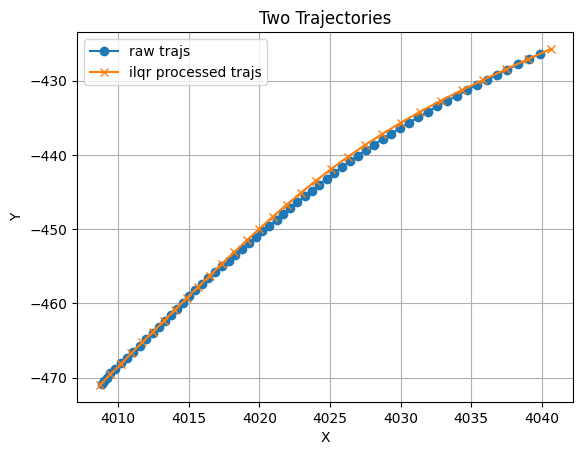

In [14]:
raw_trajs = []
after_trajs = []
for pt in call_ilqr.get_ref_pts():
    x = pt['x']
    y = pt['y']
    raw_trajs.append([x, y])

for pt in processed_trajectory[0]:
    x = pt['x']
    y = pt['y']
    after_trajs.append([x, y])

import matplotlib.pyplot as plt

# 轨迹数据
traj1 = raw_trajs
traj2 = after_trajs

# 分别提取每个轨迹的 x 和 y 坐标
x1, y1 = zip(*traj1)  # 分离 traj1 中的 x 和 y
x2, y2 = zip(*traj2)  # 分离 traj2 中的 x 和 y

# 创建一个图形对象
plt.figure()

# 绘制轨迹1
plt.plot(x1, y1, label="raw trajs", marker='o')

# 绘制轨迹2
plt.plot(x2, y2, label="ilqr processed trajs", marker='x')

# 添加图例、标签和标题
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Two Trajectories")
plt.legend()

# 显示图形
plt.grid(True)
plt.show()
